In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TRAIN = pd.read_csv('Data/train.csv')
TEST = pd.read_csv('Data/test.csv')
TRAIN.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
TRAIN.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
TRAIN.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Data Preprocessing**

In [4]:
Item_Fat_Content = {'low fat': 'Low Fat', 
                    'LF': 'Low Fat', 
                    'reg': 'Regular',
                   'Low Fat': 'Low Fat',
                   'Regular' : 'Regular'}

In [5]:
TRAIN['Item_Fat_Content'] = TRAIN['Item_Fat_Content'].apply(lambda x : Item_Fat_Content[x])
TEST['Item_Fat_Content'] = TEST['Item_Fat_Content'].apply(lambda x : Item_Fat_Content[x])

**End of Data Preprocessing**

**1. Variables Identification**

In [8]:
MISSING_VAR = ['Item_Weight', 'Outlet_Size']

In [41]:
CATEGORICAL_VAR = [
    'Item_Identifier',
    'Item_Fat_Content',
    'Item_Type',
    'Outlet_Identifier',
    'Outlet_Location_Type',
    'Outlet_Type'
]

In [42]:
CONTINUOUS_VARS = [ 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [43]:
TARGET_COL = 'Item_Outlet_Sales'

**End of Variables Identification**

## Evaluation criterion

In [64]:
### adding scores of each method
SCORE_TABLE = pd.DataFrame(columns=['Method', 'RMSE'])
SCORE_TABLE
# How to append ?
# df.append(df, ignore_index = True)

,Method,RMSE


In [44]:
# libraries required
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [45]:
#### evaluation metric
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [46]:
def test_data_and_model(clf, features, data):
    ##### spliting in to train and testing set
    trn, val = train_test_split(df, test_size=0.2, random_state=2)

    ##### Input to our model will be the features
    X_trn, X_val = trn[features], val[features]

    ##### Output to our model will be tha TARGTE_COL
    y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

    #### Scaling data 
    scale = StandardScaler()
    _ = scale.fit(X_trn)

    X_trn = scale.transform(X_trn)
    X_val = scale.transform(X_val)
    
    _ = clf.fit(X_trn, y_trn)
    y_pred = clf.predict(X_val)
    print('RMSE : ', rmse(y_val, y_pred))

# Missing Value Treatment

### **1. Droping Null Columns**

In [47]:
data = TRAIN.copy()
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [48]:
data.shape

(8523, 12)

In [49]:
data.isna().sum().sum()

3873

**Drop Null Columns**

In [50]:
df = data.drop(MISSING_VAR, axis=1)

In [51]:
df.isna().sum().sum()

0

**Encode Categorical columns**

In [52]:
df = pd.get_dummies(df, columns=CATEGORICAL_VAR, drop_first=True)

In [53]:
df.isna().sum().sum()

0

In [55]:
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1481.5897016633528


In [67]:
SCORE_TABLE = SCORE_TABLE.append({'Method': 'Drop Null Column',
                   'RMSE': 1481.58}, ignore_index=True)

### **2. Droping Null Rows**

In [56]:
data = TRAIN.copy()
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [57]:
data.shape

(8523, 12)

**Drop Null Rows**

In [58]:
df = data.dropna()

In [59]:
df.shape

(4650, 12)

**Encode Categorical columns**

In [60]:
df = pd.get_dummies(df, columns=CATEGORICAL_VAR+['Outlet_Size'], drop_first=True)

In [62]:
df.isna().sum().sum()

0

In [63]:
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1580.1064753100284


In [69]:
SCORE_TABLE = SCORE_TABLE.append({'Method': 'Drop Null Rows',
                   'RMSE': 1580.10}, ignore_index=True)

### **3. Mean Imputation**

In [73]:
data = TRAIN.copy()

In [75]:
# mean in continuous 
# mean in categorical as well
MISSING_VAR

['Item_Weight', 'Outlet_Size']

**Continuous Imputation**

In [78]:
mean = data[MISSING_VAR[0]].mean()

In [81]:
data[MISSING_VAR[0]] = data[MISSING_VAR[0]].fillna(mean)

**Categorical Imputation**

In [77]:
data[MISSING_VAR[1]].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [84]:
(0 + 1 + 2)/3

1.0

In [85]:
# encoding category
Outlet_Size = {
    'Small' : 0,
    'Medium' : 1,
    'High' : 2,
    np.nan : 1
}
data[MISSING_VAR[1]] = data[MISSING_VAR[1]].apply(lambda x: Outlet_Size[x])

In [87]:
data.isna().sum().sum()

0

**Encoding Categorical Variable**

In [90]:
df = pd.get_dummies(data, columns=CATEGORICAL_VAR+['Outlet_Size'], drop_first=True)

In [92]:
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1510.419495398348


In [93]:
SCORE_TABLE = SCORE_TABLE.append({'Method': 'Mean Imputation',
                   'RMSE': 1510.41}, ignore_index=True)

### **4. Median Imputation**

In [95]:
data = TRAIN.copy()

In [96]:
# mean in continuous 
# mean in categorical as well
MISSING_VAR

['Item_Weight', 'Outlet_Size']

**Continuous Imputation**

In [97]:
median = data[MISSING_VAR[0]].median()

In [98]:
data[MISSING_VAR[0]] = data[MISSING_VAR[0]].fillna(median)

**Categorical Imputation**

In [99]:
data[MISSING_VAR[1]].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [101]:
(0 + 1 + 2)/2

1.5

In [103]:
# encoding category
Outlet_Size = {
    'Small' : 0,
    'Medium' : 1,
    'High' : 2,
    np.nan : 1
}
data[MISSING_VAR[1]] = data[MISSING_VAR[1]].apply(lambda x: Outlet_Size[x])

In [104]:
data.isna().sum().sum()

0

**Encoding Categorical Variable**

In [105]:
df = pd.get_dummies(data, columns=CATEGORICAL_VAR+['Outlet_Size'], drop_first=True)

In [106]:
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1505.2714125866194


In [107]:
SCORE_TABLE = SCORE_TABLE.append({'Method': 'Median Imputation',
                   'RMSE': 1505.27}, ignore_index=True)

### **5. Mode Imputation**

In [109]:
data = TRAIN.copy()

In [110]:
# mean in continuous 
# mean in categorical as well
MISSING_VAR

['Item_Weight', 'Outlet_Size']

In [111]:
# mode imputation
mode = data[MISSING_VAR[0]].mode()[0]
data[MISSING_VAR[0]] = data[MISSING_VAR[0]].fillna(mode)
mode = data[MISSING_VAR[1]].mode()[0]
data[MISSING_VAR[1]] = data[MISSING_VAR[1]].fillna(mode)

In [112]:
data.isna().sum().sum()

0

In [113]:
# encoding categorical variable
df = pd.get_dummies(data, columns=CATEGORICAL_VAR+['Outlet_Size'], drop_first=True)

In [114]:
# evaluating imputation
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1506.9104423846647


In [115]:
SCORE_TABLE = SCORE_TABLE.append({'Method': 'Mode Imputation',
                   'RMSE': 1506.91}, ignore_index=True)

### **6. Nan as Feature Imputation**

**NAN with mean**

In [116]:
def impute_nan(df, variable):
    df[variable+'_NAN'] = np.where(df[variable].isnull(), 1, 0)

In [117]:
data = TRAIN.copy()

In [118]:
# nan features
impute_nan(data, MISSING_VAR[0])
impute_nan(data, MISSING_VAR[1])

In [119]:
# Continuous : mean imputation
mean = data[MISSING_VAR[0]].mean()
data[MISSING_VAR[0]] = data[MISSING_VAR[0]].fillna(mean)

In [120]:
# encoding category with mean imputation
Outlet_Size = {
    'Small' : 0,
    'Medium' : 1,
    'High' : 2,
    np.nan : 1
}
data[MISSING_VAR[1]] = data[MISSING_VAR[1]].apply(lambda x: Outlet_Size[x])

In [121]:
# encodint categorical variable
df = pd.get_dummies(data, columns=CATEGORICAL_VAR+['Outlet_Size'], drop_first=True)

In [122]:
df.isna().sum().sum()

0

In [123]:
# evaluating imputation
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1505.0253965626086


In [124]:
SCORE_TABLE = SCORE_TABLE.append({'Method': 'NAN with Mean',
                   'RMSE': 1505.91}, ignore_index=True)

**NAN with median**

In [125]:
data = TRAIN.copy()

In [126]:
# nan features
impute_nan(data, MISSING_VAR[0])
impute_nan(data, MISSING_VAR[1])

In [127]:
# Continuous : median imputation
median = data[MISSING_VAR[0]].median()
data[MISSING_VAR[0]] = data[MISSING_VAR[0]].fillna(median)

In [128]:
# encoding category with mean imputation
Outlet_Size = {
    'Small' : 0,
    'Medium' : 1,
    'High' : 2,
    np.nan : 1
}
data[MISSING_VAR[1]] = data[MISSING_VAR[1]].apply(lambda x: Outlet_Size[x])

In [129]:
# encodint categorical variable
df = pd.get_dummies(data, columns=CATEGORICAL_VAR+['Outlet_Size'], drop_first=True)

In [130]:
df.isna().sum().sum()

0

In [131]:
# evaluating imputation
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1486.4805529559903


In [132]:
SCORE_TABLE = SCORE_TABLE.append({'Method': 'NAN with Median',
                   'RMSE': 1486.48}, ignore_index=True)

**NAN with Mode**

In [136]:
data = TRAIN.copy()

In [137]:
# nan features
impute_nan(data, MISSING_VAR[0])
impute_nan(data, MISSING_VAR[1])

In [138]:
# mode imputation
mode = data[MISSING_VAR[0]].mode()[0]
data[MISSING_VAR[0]] = data[MISSING_VAR[0]].fillna(mode)
mode = data[MISSING_VAR[1]].mode()[0]
data[MISSING_VAR[1]] = data[MISSING_VAR[1]].fillna(mode)

In [139]:
data.isna().sum().sum()

0

In [140]:
# encodint categorical variable
df = pd.get_dummies(data, columns=CATEGORICAL_VAR+['Outlet_Size'], drop_first=True)

In [141]:
# evaluating imputation
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1508.79038010971


In [142]:
SCORE_TABLE = SCORE_TABLE.append({'Method': 'NAN with Mode',
                   'RMSE': 1508.79}, ignore_index=True)

### **7. Random Imputation**

In [143]:
def impute_rand_sample(df, variable, random_state):
  # random sample collecting
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=random_state)
  # eqvating indexes of random and null values
  random_sample.index = df[df[variable].isnull()].index
  # add values to their respective locations
  df.loc[ df[variable].isnull(), variable] = random_sample

In [144]:
data = TRAIN.copy()

In [147]:
for i in range(10):
    df = data.copy()
    # random imputation
    impute_rand_sample(df, MISSING_VAR[0], i)
    impute_rand_sample(df, MISSING_VAR[1], i)
    # encodint categorical variable
    df = pd.get_dummies(df, columns=CATEGORICAL_VAR+['Outlet_Size'], drop_first=True)
    features = [i for i in df.columns if i not in [TARGET_COL]]
    print('Random State:',i)
    test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

Random State: 0
RMSE :  1477.0561673170373
Random State: 1
RMSE :  1558.023404278826
Random State: 2
RMSE :  1501.9694973246758
Random State: 3
RMSE :  1535.8464409789265
Random State: 4
RMSE :  1495.3087841469855
Random State: 5
RMSE :  1506.6117060833574
Random State: 6
RMSE :  1552.0022555972846
Random State: 7
RMSE :  1573.4036244012184
Random State: 8
RMSE :  1505.027627633954
Random State: 9
RMSE :  1533.8262396366276


In [149]:
SCORE_TABLE = SCORE_TABLE.append({'Method': 'Random Imputation',
                   'RMSE': 1477.05}, ignore_index=True)

### **8. Arbitrary Imputation**

In [153]:
const = [0, -999, 999]
for c in const:
    df = data.copy()
    # with contant
    df = df.fillna(c)
    # encodint categorical variable
    df = pd.get_dummies(df, columns=CATEGORICAL_VAR+[MISSING_VAR[1]], drop_first=True)
    features = [i for i in df.columns if i not in [TARGET_COL]]
    print('Constant : ',c)
    test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

Constant :  0
RMSE :  1520.9379543554599
Constant :  -999
RMSE :  1520.9379543554599
Constant :  999
RMSE :  1519.352577654705


In [154]:
SCORE_TABLE = SCORE_TABLE.append({'Method': 'Arbitrary Imputation',
                   'RMSE': 1519.35}, ignore_index=True)

### **9. KNN Imputation**

In [299]:
data = pd.concat([TRAIN, TEST], axis=0)

In [300]:
data.shape

(14204, 12)

In [301]:
df = data.copy()

In [302]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [303]:
TARGET_1 = 'Item_Weight' # continuous type
TARGET_2 = 'Outlet_Size' # categorical type

#### For Continuous Feature Imputation

In [304]:
# extracting training data for KNN rgression
features_1 = [i for i in data.columns if i not in [TARGET_COL, TARGET_1, TARGET_2]]
data_1 = data[features_1+[TARGET_1]]

In [305]:
data_1.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight                  2439
dtype: int64

In [306]:
# encode categorical features
cat_var = [ 'Item_Identifier', 
           'Item_Fat_Content', 
           'Item_Type', 
           'Outlet_Identifier', 
           'Outlet_Location_Type', 
           'Outlet_Type']
data_1 = pd.get_dummies(data_1, columns=cat_var, drop_first=True)

In [307]:
# dropping null values
data_1 = data_1.dropna()

In [308]:
data_1.shape

(11765, 1592)

In [309]:
#seperating independent and dependent variables
x = data_1.drop([TARGET_1], axis=1)
y = data_1[TARGET_1]
x.shape, y.shape

((11765, 1591), (11765,))

In [310]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler_1 = MinMaxScaler()
x_scaled = scaler_1.fit_transform(x)

In [197]:
x = pd.DataFrame(x_scaled)

In [198]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [199]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [200]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = np.sqrt(mse(test_predict, test_y))
print('Test MSE    ', k )

Test MSE     4.770638694454355


**Elbow for Classifier**

In [201]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [202]:
#Defining K range
k = range(1,40)

In [203]:
# calling above defined function
test_scores = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

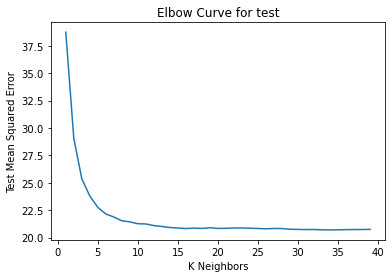

In [204]:
# plotting the Curves
plt.plot(k, test_scores)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [205]:
print('Best K : ', np.argmin(test_scores))

Best K :  33


In [206]:
# Creating instance of KNN
reg = KNN(n_neighbors = np.argmin(test_scores))

# Fitting the model
reg.fit(x, y)

KNeighborsRegressor(n_neighbors=33)

**Store Regression Model**

In [227]:
import pickle

# model instance
model_name = 'reg_KNN.pkl'
reg_model = open('Model/'+model_name, 'wb')
# Save the trained model as a pickle string.
pickle.dump(reg, reg_model)
#closing file
reg_model.close()

#### For Categorical Feature Imputation

In [311]:
# extracting testing data for KNN Classification
features_2 = [i for i in data.columns if i not in [TARGET_COL, TARGET_1, TARGET_2]]
data_2 = data[features_1+[TARGET_2]]

In [312]:
data_2.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Outlet_Size                  4016
dtype: int64

In [313]:
# encode categorical features
cat_var = [ 'Item_Identifier', 
           'Item_Fat_Content', 
           'Item_Type', 
           'Outlet_Identifier', 
           'Outlet_Location_Type', 
           'Outlet_Type']
data_2 = pd.get_dummies(data_2, columns=cat_var, drop_first=True)

In [314]:
# dropping null values
data_2 = data_2.dropna()

In [315]:
# encoding target variable
Outlet_Size = {
    'Small' : 0,
    'Medium' : 1,
    'High' : 2
}
data_2['Outlet_Size'] = data_2['Outlet_Size'].apply(lambda x: Outlet_Size[x])

In [316]:
data_2.shape

(10188, 1592)

In [317]:
#seperating independent and dependent variables
x = data_2.drop([TARGET_2], axis=1)
y = data_2[TARGET_2]
x.shape, y.shape

((10188, 1591), (10188,))

In [318]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler_2 = MinMaxScaler()
x_scaled = scaler_2.fit_transform(x)

In [209]:
x = pd.DataFrame(x_scaled)

In [210]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, stratify = y)

In [211]:
#importing KNN clssifier and metric f1 score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score as f1

In [213]:
# Creating instance of KNN
clf = KNN(n_neighbors = 5)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1 score
test_predict = clf.predict(test_x)
k = f1(test_predict, test_y, average='weighted')
print('Test F1    ', k )

Test F1     1.0


**Elbow for Classifier**

In [214]:
def Elbow(K):
  #initiating empty list
    test_f1 = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1(tmp,test_y, average='weighted')
        test_f1.append(tmp)
    
    return test_f1

In [215]:
#Defining K range
k = range(1,40)

In [216]:
# calling above defined function
test_scores = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

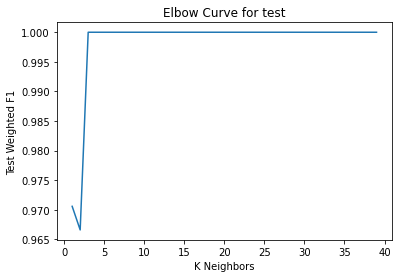

In [217]:
# plotting the Curves
plt.plot(k, test_scores)
plt.xlabel('K Neighbors')
plt.ylabel('Test Weighted F1')
plt.title('Elbow Curve for test')

In [218]:
print('Best K : ', np.argmax(test_scores))

Best K :  2


In [219]:
# Creating instance of KNN
clf = KNN(n_neighbors = np.argmax(test_scores))

# Fitting the model
clf.fit(x, y)

KNeighborsClassifier(n_neighbors=2)

**Store Classification Model**

In [226]:
import pickle

# model instance
model_name = 'clf_KNN.pkl'
clf_model = open('Model/'+model_name, 'wb')
# Save the trained model as a pickle string.
pickle.dump(clf, clf_model)
#closing file
clf_model.close()

### KNN Prediction

**TARGET_1**

In [319]:
# data to make continuous prediction
data = TRAIN[features_1 + [TARGET_1]]

In [320]:
data.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight                  1463
dtype: int64

In [321]:
# encode categorical features
cat_var = [ 'Item_Identifier', 
           'Item_Fat_Content', 
           'Item_Type', 
           'Outlet_Identifier', 
           'Outlet_Location_Type', 
           'Outlet_Type']
x_test = pd.get_dummies(data, columns=cat_var, drop_first=True)

In [322]:
x_test.shape

(8523, 1592)

In [323]:
# test data
null_data_1 = x_test[x_test[TARGET_1].isna()]

In [324]:
null_data_1.shape

(1463, 1592)

In [325]:
x_test = null_data_1.drop([TARGET_1], axis=1)

In [326]:
# MinMax Scaler
x_scaled = scaler_1.fit_transform(x_test)

In [327]:
# loading regression model
test_pred = reg.predict(x_scaled)

In [328]:
test_pred

array([14.33939394, 11.05681818, 12.50318182, ..., 15.3769697 ,
       13.27393939, 12.90939394])

In [329]:
null_data_1.index

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
           dtype='int64', length=1463)

In [330]:
TARGET_1_PREDICTION = pd.DataFrame({TARGET_1 : test_pred}, index=null_data_1.index)

**TARGET_2**

In [331]:
# data to make categorical prediction
data = TRAIN[features_2 + [TARGET_2]]

In [332]:
data.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Outlet_Size                  2410
dtype: int64

In [333]:
# encode categorical features
cat_var = [ 'Item_Identifier', 
           'Item_Fat_Content', 
           'Item_Type', 
           'Outlet_Identifier', 
           'Outlet_Location_Type', 
           'Outlet_Type']
x_test = pd.get_dummies(data, columns=cat_var, drop_first=True)

In [334]:
x_test.shape

(8523, 1592)

In [335]:
# test data
null_data_2 = x_test[x_test[TARGET_2].isna()]

In [336]:
null_data_2.shape

(2410, 1592)

In [337]:
x_test = null_data_2.drop([TARGET_2], axis=1)

In [338]:
# MinMax Scaler
x_scaled = scaler_2.fit_transform(x_test)

In [339]:
# loading regression model
test_pred = clf.predict(x_scaled)

In [340]:
test_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [343]:
# decoding target variable
Outlet_Size = {
    0 : 'Small',
    1 : 'Medium',
    2 : 'High'
}
pred = []
for i in test_pred:
    pred.append(Outlet_Size[i])

In [346]:
TARGET_2_PREDICTION = pd.DataFrame({TARGET_2 : pred}, index=null_data_2.index)

### Mapping predictions to exact places

In [349]:
data = TRAIN.copy()

In [350]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [351]:
TARGET_1_PREDICTION.head()

,Item_Weight
7,14.339394
18,11.056818
21,12.503182
23,13.134242
29,12.847879


In [352]:
# add values to their respective locations
data.loc[ data[TARGET_1].isnull(), TARGET_1] = TARGET_1_PREDICTION

In [355]:
# add values to their respective locations
data.loc[ data[TARGET_2].isnull(), TARGET_2] = TARGET_2_PREDICTION

In [356]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [354]:
# mapping successful

In [357]:
# encodint categorical variable
df = pd.get_dummies(data, columns=CATEGORICAL_VAR+['Outlet_Size'], drop_first=True)

In [358]:
df.shape

(8523, 1595)

In [359]:
# evaluating imputation
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1505.6327769553855


In [360]:
SCORE_TABLE = SCORE_TABLE.append({'Method': 'KNN Imputation',
                   'RMSE': 1505.63}, ignore_index=True)

In [361]:
SCORE_TABLE

,Method,RMSE
0,Drop Null Column,1481.58
1,Drop Null Rows,1580.10
2,Mean Imputation,1510.41
3,Median Imputation,1505.27
4,Mode Imputation,1506.91
5,NAN with Mean,1505.91
6,NAN with Median,1486.48
7,NAN with Mode,1508.79
8,Random Imputation,1477.05
9,Arbitrary Imputation,1519.35


In [400]:
def Plot(df, x, y):
    plt.figure(figsize=(15,6))
    xaxis = np.array(list(df[x]))
    yaxis = np.array(list(df[y]))
    plt.plot(xaxis, yaxis, label='RMSE')
    minm = np.argmin(yaxis)
    plt.scatter(xaxis[minm], yaxis[minm], c='r', label='Best RMSE: %r' % yaxis[minm])
    plt.xticks(rotation=45)
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y, fontsize=15)
    plt.title(x+' Vs '+y, fontsize=15)
    plt.grid()
    plt.legend()
    plt.show()

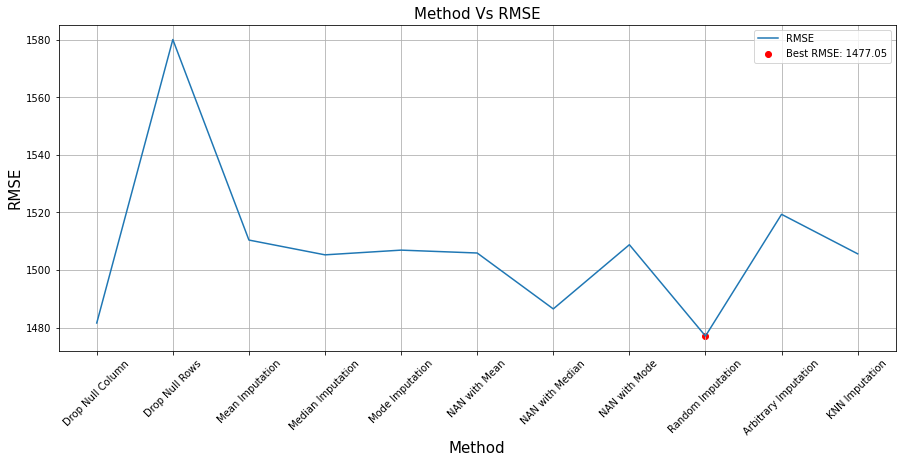

In [401]:
Plot(SCORE_TABLE, 'Method', 'RMSE')

**Using Random Imputation for Final Cleaning of Data**

In [402]:
train = TRAIN.copy()
test = TEST.copy()

In [403]:
random_state = 0

# random imputation for train
impute_rand_sample(train, MISSING_VAR[0], random_state)
impute_rand_sample(train, MISSING_VAR[1], random_state)

# random imputation for train
impute_rand_sample(test, MISSING_VAR[0], random_state)
impute_rand_sample(test, MISSING_VAR[1], random_state)

**Save cleaned data**

In [404]:
train_path = 'Data/train_imputed.csv'
train.to_csv(train_path, index=False)

test_path = 'Data/test_imputed.csv'
test.to_csv(test_path, index=False)

**Cross checking**

In [405]:
pd.read_csv(train_path).isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [406]:
pd.read_csv(test_path).isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64